# Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import re
import nltk

## Dataset: [The Internet Movie Script Database (IMSDb)](https://imsdb.com/)

In [2]:
df = pd.read_csv('data/imsdb-scripts.csv')

In [3]:
df0 = df.copy()

Data have been obtained by scraping. During that, missing values (movies without script) have been handled.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1140 non-null   object
 1   genre    1140 non-null   object
 2   writers  1140 non-null   object
 3   url      1140 non-null   object
 4   script   1140 non-null   object
dtypes: object(5)
memory usage: 44.7+ KB


In [5]:
df.head()

,title,genre,writers,url,script
0,10 Things I Hate About You,"['Comedy', 'Romance']","['Karen McCullah Lutz', 'Kirsten Smith', 'Will...",https://imsdb.com/scripts/10-Things-I-Hate-Abo...,\n\r\n\r\n\r\nTen Things I Hate About You - by...
1,12,['Comedy'],['Lawrence Bridges'],https://imsdb.com/scripts/12.html,\n\n\n \r\n 12 - Script\r\n[[None]]\n
2,12 and Holding,['Drama'],['Anthony Cipriano'],https://imsdb.com/scripts/12-and-Holding.html,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...
3,12 Monkeys,"['Drama', 'Sci-Fi', 'Thriller']","['David Peoples', 'Janet Peoples']",https://imsdb.com/scripts/12-Monkeys.html,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...
4,12 Years a Slave,['Drama'],['John Ridley'],https://imsdb.com/scripts/12-Years-a-Slave.html,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...


In [6]:
def random_script(df):
    return df.iloc[random.randint(0, len(df))]['script']

In general, script formatting is standardized. Square brackets represent original bold formatting, which for the most identifies movie characters.

In [7]:
print(random_script(df))






[[MANHATTANMURDERMYSTERY]]
                         
                          

                                   Screenplay by

                          Woody Allen & Marshall Brickman




                         
[[NOTE]]

          Most of the sequences in this production are filmed using a hand-
          held camera or a Steadycam. These very mobile cameras move around
          the set, and get constantly closer and further from the
          characters. Still, we'll be using the usual technical terms, such
          as �long shot� or �full shot� or �medium shot� here and there to
          give the reader an idea of the location of the camera at the
          beginning of each sequence. And then we'll mention the movements
          of the camera.

                         
[[TRISTARLOGO]]
          Winged white horse flying over clouds
                         
 
[[BLACKSCREEN]]
                         
[[CREDITSINWHITELETTERSONBLACKSCREEN]]
                         


During scraping, genres have been stored in a list, but now they are a string in a list format. We must process them. Then, we store them in binary variables.

In [8]:
def process_genre_string(genre_string):
    for char in ['[',']','.',',','\'']:
        genre_string = genre_string.replace(char, ' ')
    return genre_string.split()


genres = list()
# getting the list of the genres
for genres_in_movie in df['genre']:
    genres_found = [g for g in process_genre_string(genres_in_movie)]
    genres = list(set(genres + genres_found))
genres.remove('None')
genres

['Fantasy',
 'Adventure',
 'Musical',
 'Sport',
 'Thriller',
 'War',
 'History',
 'Film-Noir',
 'Family',
 'Comedy',
 'Biography',
 'Drama',
 'Short',
 'Animation',
 'Music',
 'Romance',
 'Action',
 'Sci-Fi',
 'Mystery',
 'Crime',
 'Horror',
 'Western']

In [9]:
# storing every genre in a binary variable
for genre in genres:
    df[genre] = [1 if genre in g else 0 for g in df['genre'].values]

In [10]:
df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)
df.head()

/tmp/ipykernel_25827/2992972678.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)


,script,Fantasy,Adventure,Musical,Sport,Thriller,War,History,Film-Noir,Family,...,Short,Animation,Music,Romance,Action,Sci-Fi,Mystery,Crime,Horror,Western
0,\n\r\n\r\n\r\nTen Things I Hate About You - by...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,\n\n\n \r\n 12 - Script\r\n[[None]]\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Genre can be our ground truth for a binary classification (e.g. drama not-drama) or a multiclass classification.

In [11]:
sorted([(genre, sum(df[genre].values)) for genre in genres],
       key=lambda x: x[1],
       reverse=True)

[('Drama', 621),
 ('Thriller', 381),
 ('Comedy', 371),
 ('Action', 309),
 ('Crime', 217),
 ('Romance', 196),
 ('Adventure', 186),
 ('Sci-Fi', 167),
 ('Horror', 155),
 ('Fantasy', 116),
 ('Mystery', 112),
 ('Family', 42),
 ('Animation', 42),
 ('Music', 30),
 ('War', 28),
 ('Musical', 25),
 ('Western', 15),
 ('Film-Noir', 4),
 ('History', 3),
 ('Biography', 3),
 ('Short', 3),
 ('Sport', 2)]

Genres are not mutually exclusive. There can be some relations between them. For now, we can treat movies like sets according to genre using the Jaccard index, but we can also do transactional clustering.

In [12]:
def jaccard_binary(x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

sorted([(genre_combination, jaccard_binary(df[genre_combination[0]], df[genre_combination[1]]))
        for genre_combination in list(itertools.combinations(genres, 2))],
       key=lambda x: x[1],
       reverse=True)

[(('Musical', 'Music'), 0.8333333333333334),
 (('Family', 'Animation'), 0.3125),
 (('Adventure', 'Action'), 0.30606860158311344),
 (('Thriller', 'Action'), 0.2730627306273063),
 (('Action', 'Sci-Fi'), 0.2625994694960212),
 (('Thriller', 'Crime'), 0.25630252100840334),
 (('Thriller', 'Horror'), 0.24074074074074073),
 (('Thriller', 'Drama'), 0.23095823095823095),
 (('Comedy', 'Romance'), 0.2167381974248927),
 (('Drama', 'Romance'), 0.19970631424375918),
 (('Thriller', 'Mystery'), 0.19951338199513383),
 (('Drama', 'Crime'), 0.1988555078683834),
 (('Adventure', 'Sci-Fi'), 0.19661016949152543),
 (('Fantasy', 'Adventure'), 0.1796875),
 (('Musical', 'Family'), 0.17543859649122806),
 (('Family', 'Music'), 0.16129032258064516),
 (('Comedy', 'Drama'), 0.1588785046728972),
 (('Action', 'Crime'), 0.15859030837004406),
 (('Thriller', 'Sci-Fi'), 0.15611814345991562),
 (('Mystery', 'Horror'), 0.1459227467811159),
 (('Fantasy', 'Family'), 0.1366906474820144),
 (('Fantasy', 'Action'), 0.136363636363636

## From Text to Time Series

### Defining timestamps

First, we must identify our timestamps. Scripts are divided into lines. We can use square brackets (bold formatting) as a splitting condition. This is much refined and domain-based than sentence splitting.

In [13]:
def script_splitting(script):
    #
    script = re.sub(r'\((\d+|'
                    r'[Cc][Oo][Nn][Tt](\'|[Ii][Nn][Uu][Ed])[Dd]|'
                    r'[Mm][Oo][Rr][Ee])\)',
                    '', script)
    script = ' '.join(script.split())
    #
    script = re.sub(r'\[.+?\] ', '[SEP]', script)
    script = re.sub(r'(\[SEP\])+', '[SEP]', script)
    split_script = [line for line in re.split(r' ?\[SEP\]', script) if line]
    if not split_script:
        return ['']
    # cleaning
    # TODO: set more refined rules or cut the fist n lines
    if split_script[0].startswith('Written by'):
        split_script.pop(0)
    return split_script

In [14]:
script_splitting(random_script(df))

["Foreboding organ music is heard... We are looking down at a rough brick floor ... is it an alley? ... a cobblestone street? ... a warehouse? a factory? ... we're not sure... The flickering glow of flame is the only illumination... The ominous organ music continues as... From the bottom of the frame... A dark pool of blood slowly begins to spread ... moving up the frame, defying gravity ... the flickering flame reflected in the blood... Finally, the pool of blood fills the entire frame.",
 "A shrill factory whistle blows-- ENORMOUSLY LOUD -- blood-chilling and spine-shattering -- the whistle is a bizarre combination of sound: a factory whistle; a hog being slaughtered; a dog snarling; a roaring inferno; a human scream-- And a man's face appears, upside down, reflected in the pool of blood. He is THE GENTLEMAN, a slender dandy in pearl grey gloves and matching waistcoat. A cold and superior aristocrat. The camera slowly revolves -- the Gentleman becoming right side up as--",
 'Attend t

Once we have our lines, we can convert them into an actual timestamp extracting some numeric features like, for example:
- distributional features;
- sentiment/emotion analysis;
- word/sentence embedding.

The result would be a uni-variate or multivariate time series.

### Example: Sentiment Time Series with VADER

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mattiap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Source code: [https://www.nltk.org/_modules/nltk/sentiment/vader.html](https://www.nltk.org/_modules/nltk/sentiment/vader.html)

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a lexical-based model used for text sentiment analysis. It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER is plug and play: it can be applied directly to unlabeled text data without tokenization. VADER is also sensitive to negation, capitalization and punctuation. Given a sentence, VADER returns a dictionary of scores in each of four categories: negative, neutral, positive and compound (normalized score for the three before). We can use the compound score to map sentiment in a uni-variate time series.

In [16]:
def generate_vader_ts(script):
    sid = SentimentIntensityAnalyzer()
    ts = [(sid.polarity_scores(line)['compound'],
           line)
          for line in script]
    return ts

In [17]:
generate_vader_ts(
    script_splitting(
        random_script(df)))

[(0.0, 'Rocky'),
 (0.0, 'by Sylvester Stallone'),
 (0.415,
  "... The club itself resembles a large unemptied trash-can. The boxing ring is extra small to insure constant battle. The lights overhead have barely enough wattage to see who is fighting. In the ring are two heavyweights, one white the other black. The white fighter is ROCKY BALBOA. He is thirty years old. His face is scarred and thick around the nose... His black hair shines and hangs in his eyes. Rocky fights in a plodding, machine-like style. The BLACK FIGHTER dances and bangs combinations into Rocky's face with great accuracy. But the punches do not even cause Rocky to blink... He grins at his opponent and keeps grinding ahead. The people at ringside sit on folding chairs and clamor for blood... They lean out of their seats and heckle the fighters. In the thick smoke they resemble spectres. Everyone is hustling bets... The action is even heavier in the balcony. A housewife yells for somebody to cover a two dollar bet. Th

Using VADER, sentiment time series of a movie script would appear like this (some transformation would be needed):

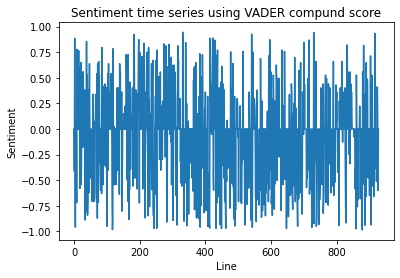

In [18]:
fig, ax = plt.subplots()
ax.plot([line[0] for line in  generate_vader_ts(
    script_splitting(
        random_script(df)))])
ax.set_xlabel('Line')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment time series using VADER compund score')
plt.show()

### Data preparation for time series

In [19]:
n_lines = [len(script_splitting(script)) for script in df['script']]
mn_lines = np.mean(n_lines)
std_lines = np.std(n_lines)
max_lines = max(n_lines)
min_lines = min(n_lines)

In [20]:
print(f'Average number of lines: {mn_lines}')
print(f'Standard deviation: {std_lines}')
print(f'MAX: {max_lines}')
print(f'MIN: {min_lines}')

Average number of lines: 963.6938596491228
Standard deviation: 378.8496880065324
MAX: 2853
MIN: 1


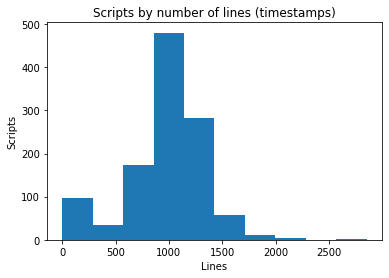

In [21]:
fig, ax = plt.subplots()
ax.hist(n_lines)
ax.set_xlabel('Lines')
ax.set_ylabel('Scripts')
ax.set_title('Scripts by number of lines (timestamps)')
plt.show()